In [1]:
from my_packages import *
from appgeopy import *

In [2]:
mlcw_h5_fpath = "20241105_MLCW_CRFP_v6.h5"
mlcw_data, mlcw_metadata = open_HDF5(mlcw_h5_fpath)

In [3]:
# initiate MLCW class object
mlcw = MLCW(h5_fpath=mlcw_h5_fpath)

mlcw_stations = mlcw.list_stations()
mlcw_stations[:5]

['ANHE', 'ANNAN', 'BEICHEN', 'BUDAI_XIN', 'CANLIN']

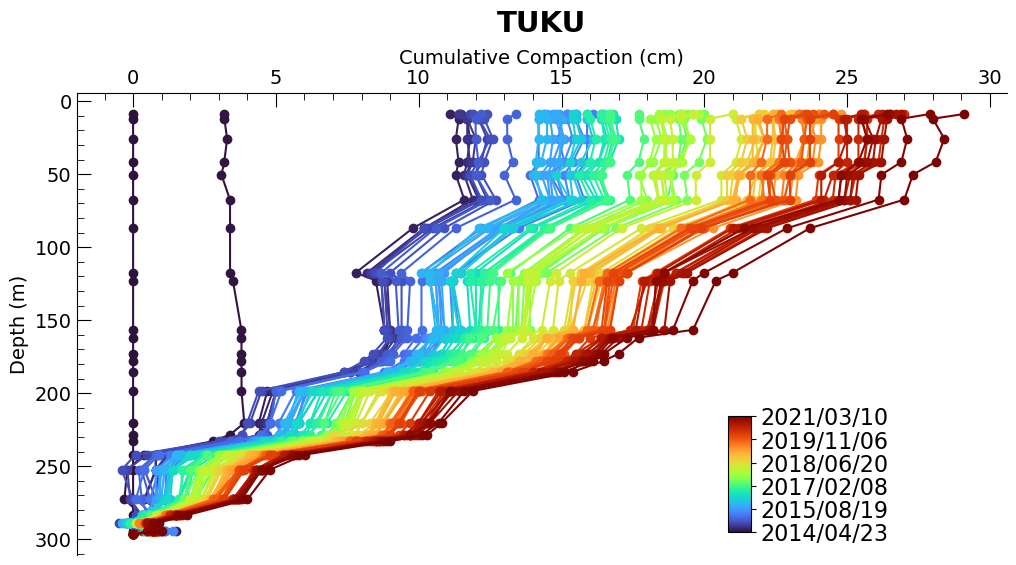

In [32]:
select_station = "TUKU"

# Quick plot from station data, filtering 2016-2021, referencing first column, scaling to cm
mlcw.quick_plot(
    station=select_station,
    start_date="2014",
    end_date="3-2021",
    reference_to_first_measurement=True,
    multiply_factor=100.0,
    figsize=(12, 6)
)

In [28]:
all_mlcw_excel_files

['pca_result_n\\AHES_pca_data.xlsx',
 'pca_result_n\\BCES_pca_data.xlsx',
 'pca_result_n\\CTWS_pca_data.xlsx',
 'pca_result_n\\DGES_pca_data.xlsx',
 'pca_result_n\\ELES_pca_data.xlsx',
 'pca_result_n\\FAES_pca_data.xlsx',
 'pca_result_n\\FRES_pca_data.xlsx',
 'pca_result_n\\GFES_pca_data.xlsx',
 'pca_result_n\\HCES_pca_data.xlsx',
 'pca_result_n\\HFES_pca_data.xlsx',
 'pca_result_n\\HLES_pca_data.xlsx',
 'pca_result_n\\HNES_pca_data.xlsx',
 'pca_result_n\\HWES_pca_data.xlsx',
 'pca_result_n\\JNES_pca_data.xlsx',
 'pca_result_n\\JSES_pca_data.xlsx',
 'pca_result_n\\JYES_pca_data.xlsx',
 'pca_result_n\\KTES_pca_data.xlsx',
 'pca_result_n\\LYES_pca_data.xlsx',
 'pca_result_n\\NLPS_pca_data.xlsx',
 'pca_result_n\\QYES_pca_data.xlsx',
 'pca_result_n\\SHES_pca_data.xlsx',
 'pca_result_n\\SIES_pca_data.xlsx',
 'pca_result_n\\SJES_pca_data.xlsx',
 'pca_result_n\\SKES_pca_data.xlsx',
 'pca_result_n\\SPES_pca_data.xlsx',
 'pca_result_n\\SSES_pca_data.xlsx',
 'pca_result_n\\STES_pca_data.xlsx',
 

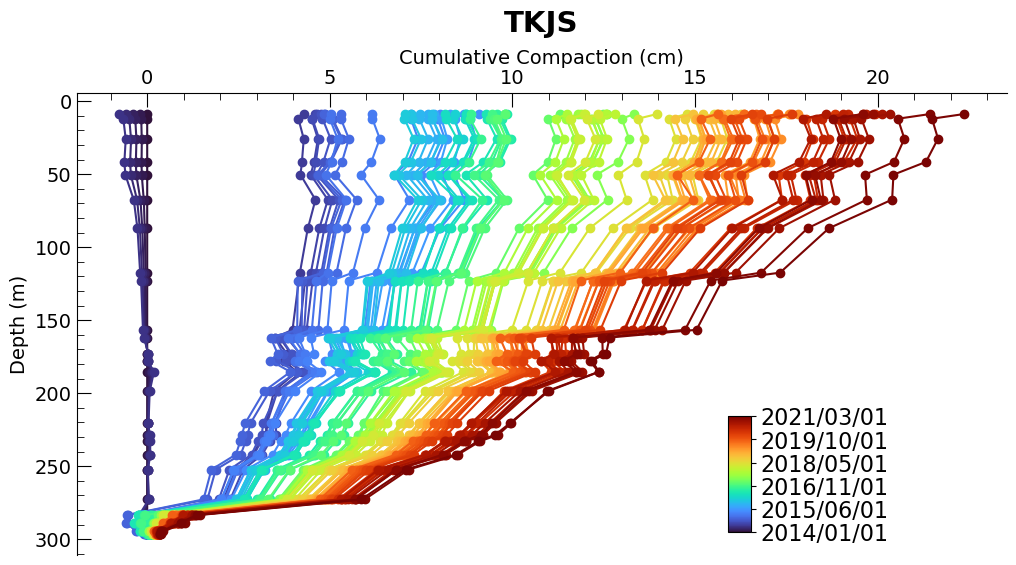

In [34]:
all_mlcw_excel_files = glob(os.path.join("pca_result_n/", "*.xlsx"))
cleaned_mlcw_fpath = r"pca_result_n\TKJS_pca_data.xlsx"
# get the well code from name
wellcode_from_fpath = os.path.basename(cleaned_mlcw_fpath).split("_")[0]
# read the cleaned MLCW data from excel file
cleaned_mlcw_df = pd.read_excel(cleaned_mlcw_fpath, index_col=[0])
# change the name of index (as datetime strings)
# the columns of this dataframe is depths
cleaned_mlcw_df.index.name = "time"

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# transpose, so now the indexes are depths, and the columns are datetime strings
cleaned_mlcw_df = cleaned_mlcw_df.transpose()
# change the name of indexes
cleaned_mlcw_df.index.name = "depth"
# turn the datetime strings to timestamps for plotting
cleaned_mlcw_df.columns = pd.to_datetime(cleaned_mlcw_df.columns)
cleaned_mlcw_df = cleaned_mlcw_df*0.1

mlcw.quick_plot(
    df=cleaned_mlcw_df,
    start_date="2014",
    end_date="2022",
    station_label=wellcode_from_fpath,
    reference_to_first_measurement=True,
    multiply_factor=1,
    figsize=(12, 6)
)

'pca_result_n\\BCES_pca_data.xlsx'